In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_ds,train_labels),(test_ds,test_labels)=tfds.load('tf_flowers',
                                                        split=['train[:70%]','train[:30%]'],
                                                        batch_size=-1,
                                                        as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to ~/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [4]:
train_ds[0].shape

TensorShape([442, 1024, 3])

In [5]:
train_ds = tf.image.resize(train_ds,(224,224))
test_ds = tf.image.resize(test_ds,(224,224))

In [6]:
train_labels

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0])>

In [7]:
train_labels = to_categorical(train_labels,num_classes=5)
test_labels = to_categorical(test_labels,num_classes=5)

In [8]:
train_labels[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


In [15]:
input_shape=train_ds[0].shape
input_shape

TensorShape([224, 224, 3])

In [16]:
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=input_shape)

94765736/94765736 [==============================] - 1s 0us/step


In [17]:
base_model.trainable=False

In [18]:
train_ds=preprocess_input(train_ds)
test_ds=preprocess_input(test_ds)

In [19]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [20]:
from tensorflow.keras import layers,models

flatten_layer = layers.Flatten()
dense_1 = layers.Dense(50,activation='relu')
dense_2 = layers.Dense(20,activation='relu')
prediction_layer = layers.Dense(5,activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_1,
    dense_2,
    prediction_layer
])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
es = EarlyStopping(patience=3,monitor='accuracy')

In [23]:
model.fit(train_ds,train_labels,epochs=10,callbacks=[es],validation_data=(test_ds,test_labels))

Epoch 1/10
81/81 [==============================] - 526s 6s/step - loss: 1.6389 - accuracy: 0.4710 - val_loss: 0.9646 - val_accuracy: 0.6367
Epoch 2/10
81/81 [==============================] - 519s 6s/step - loss: 0.8945 - accuracy: 0.6890 - val_loss: 0.6384 - val_accuracy: 0.7875
Epoch 3/10
81/81 [==============================] - 521s 6s/step - loss: 0.6949 - accuracy: 0.7404 - val_loss: 0.4687 - val_accuracy: 0.8093
Epoch 4/10
81/81 [==============================] - 521s 6s/step - loss: 0.4721 - accuracy: 0.8213 - val_loss: 0.4715 - val_accuracy: 0.8156
Epoch 5/10
81/81 [==============================] - 517s 6s/step - loss: 0.3646 - accuracy: 0.8552 - val_loss: 0.2286 - val_accuracy: 0.9019
Epoch 6/10
81/81 [==============================] - 516s 6s/step - loss: 0.3065 - accuracy: 0.8867 - val_loss: 0.2197 - val_accuracy: 0.9083
Epoch 7/10
81/81 [==============================] - 518s 6s/step - loss: 0.2480 - accuracy: 0.9046 - val_loss: 0.1877 - val_accuracy: 0.9192
Epoch 8/10
81

In [24]:
metrics = pd.DataFrame(model.history.history)

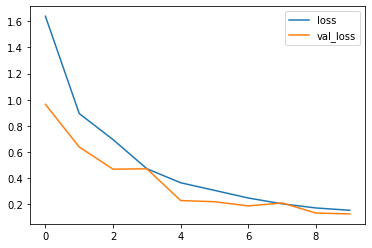

In [25]:
metrics[['loss','val_loss']].plot()

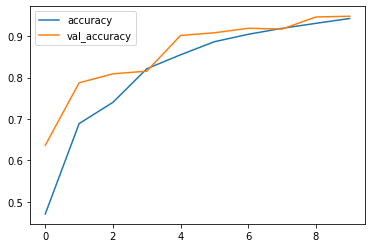

In [26]:
metrics[['accuracy','val_accuracy']].plot()